In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pprint
h08dir = '/home/kajiyama/H08/H08_20230612'
SUF = '.gl5'
dtype = 'float32'
gl5shape = (2160, 4320)
hlfshape = (360, 720)

In [5]:
# canal file
destination = np.fromfile('/home/kajiyama/H08/H08_20230612/map/org/Aoba/existing_destination_1.gl5', dtype='float32').reshape(gl5shape)
destination_masked = np.ma.masked_where(destination == 0, destination)

projection = ccrs.PlateCarree(central_longitude=0)
img_extent = (-180, 180, -90, 90)
fig = plt.figure(figsize=(100,100))
ax = plt.subplot(projection=projection)
ax.coastlines()
im = ax.imshow(destination_masked, extent=img_extent, transform=projection, cmap='rainbow')
plt.colorbar(im)

660 780 2460 2640
28.0


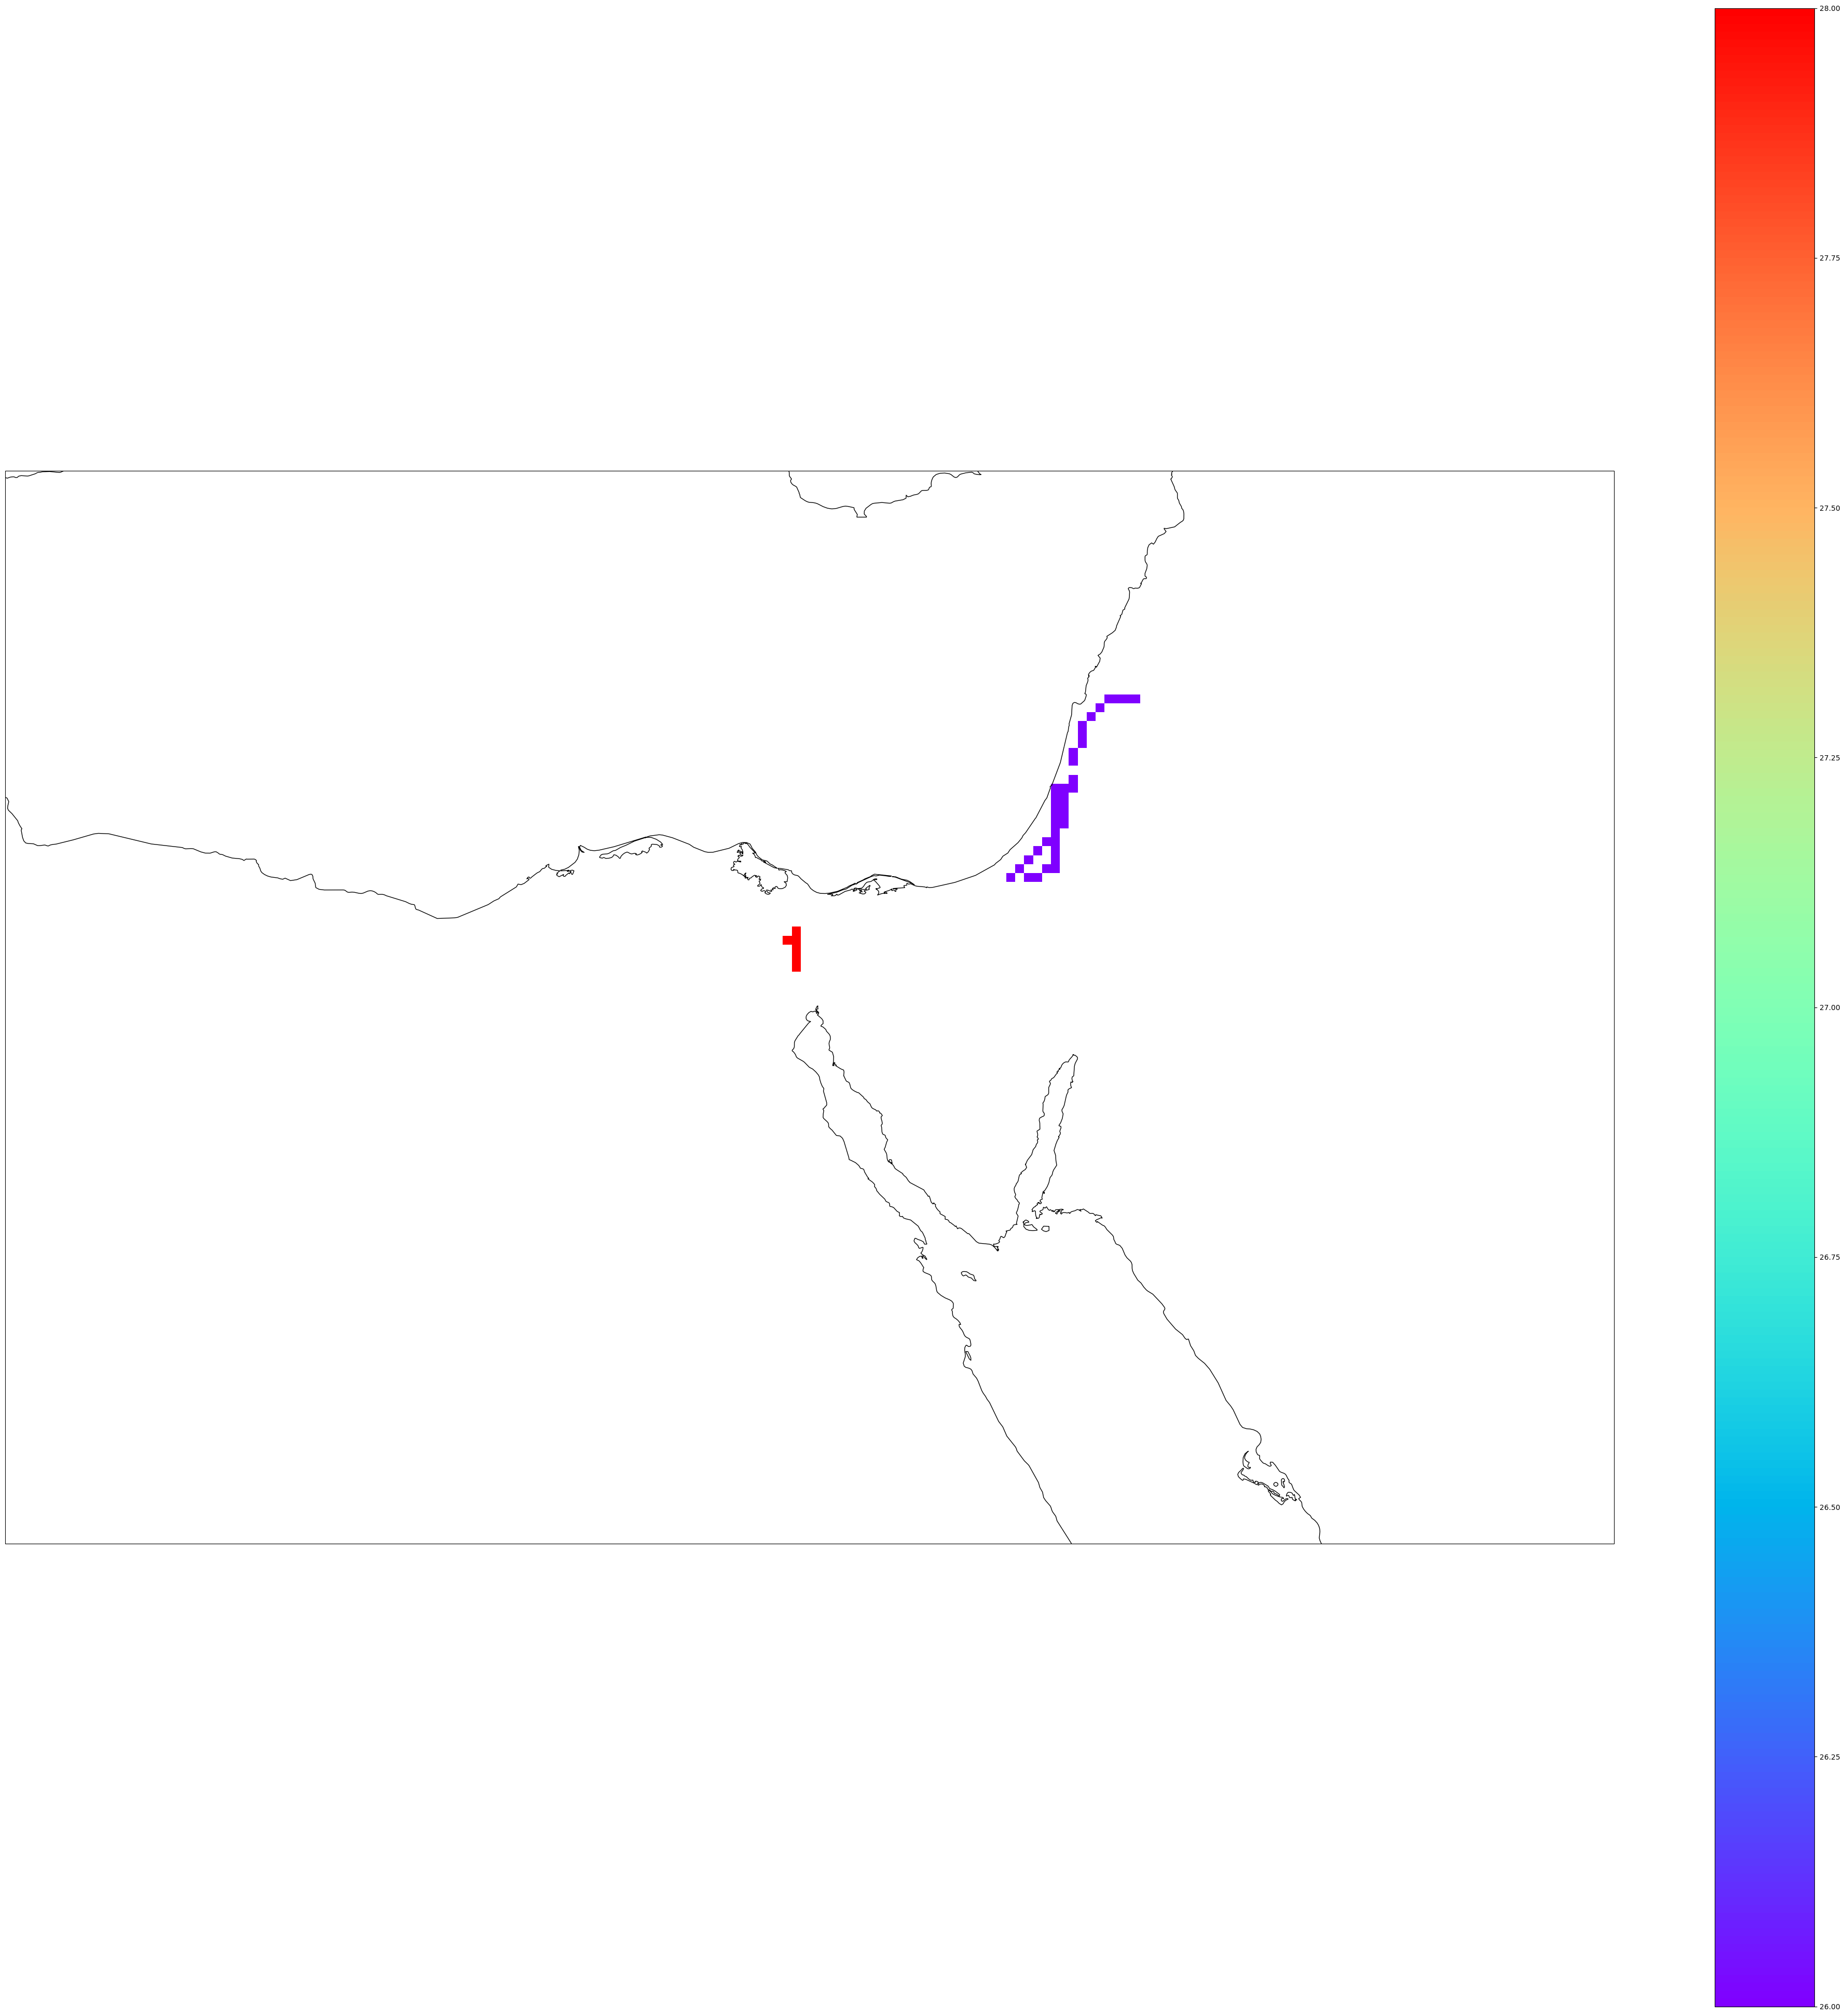

In [7]:
# tokyo region
# "138 141 34 38"
one = 25 
two = 40
three = 25
four = 35
resolution= 12
upperindex = (90-four)*resolution
lowerindex = (90-three)*resolution
leftindex = (180+one)*resolution
rightindex = (180+two)*resolution
print(upperindex, lowerindex, leftindex, rightindex)

# crop
destination_cropped = destination_masked[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]

# masked
print(np.max(destination_cropped))

projection = ccrs.PlateCarree(central_longitude=0)
img_extent = (one, two, three, four)
fig = plt.figure(figsize=(50,50))
ax = plt.subplot(projection=projection)
ax.coastlines()
im = ax.imshow(destination_cropped, extent=img_extent, transform=projection, cmap='rainbow')
plt.colorbar(im)